# 1. Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
df = pd.read_csv('bank_marketing.csv', sep=";")
df.drop_duplicates()
df.shape
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### (1) Overview of the outcome of marketing
Among all people contacted during this marketing activity period, only 11% of the target people become our customer.

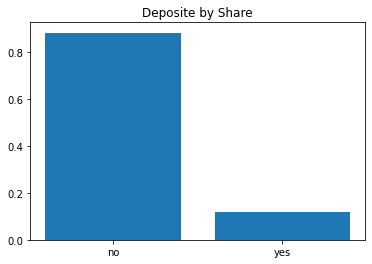

In [2]:
deposite = df["y"]
deposite_p = deposite.value_counts(normalize=True)
plt.bar(deposite_p.index,deposite_p)
plt.title("Deposite by Share")
plt.show()

### (2) Distribution - category variables
Observation:
There’s significant correlation between poutcome-customers with successful outcome from the previous campaign are more likely 
subscribed the deposit(1.0% share of "no" v.s. 1.8% share of "yes")
Besides, housing and loan show some correlation too.

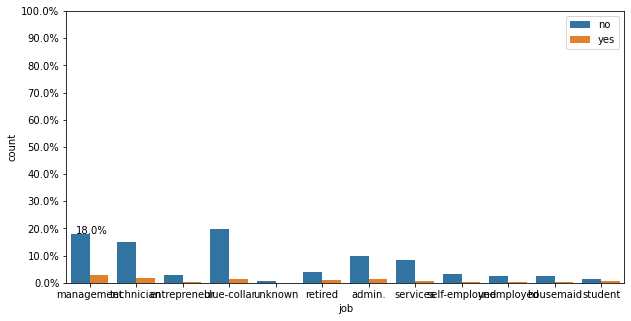

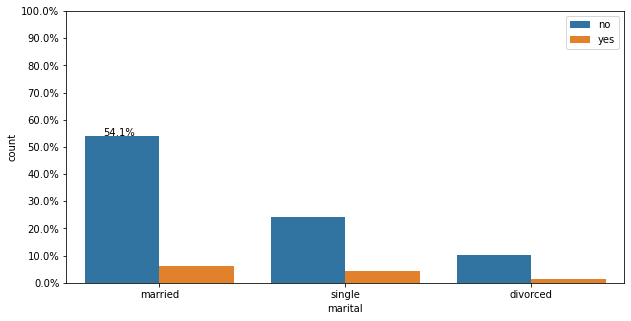

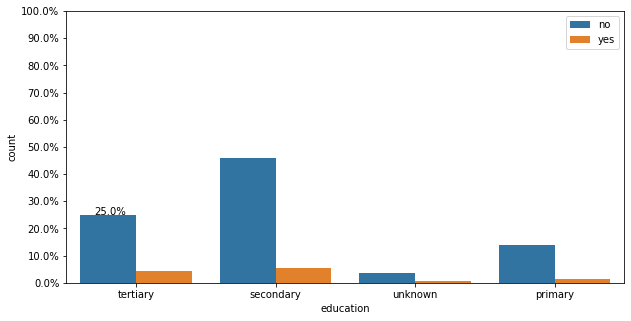

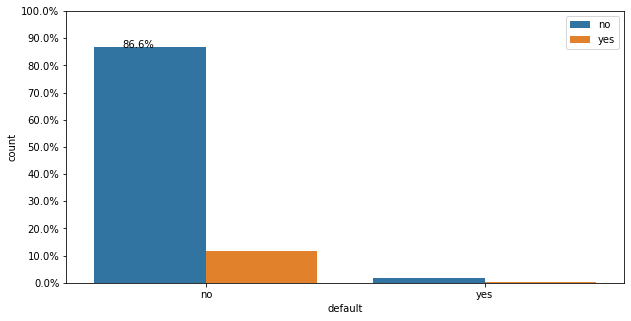

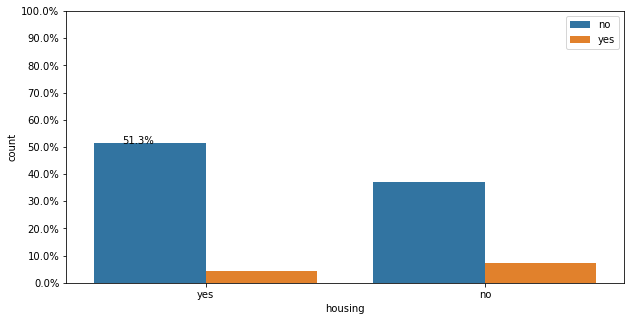

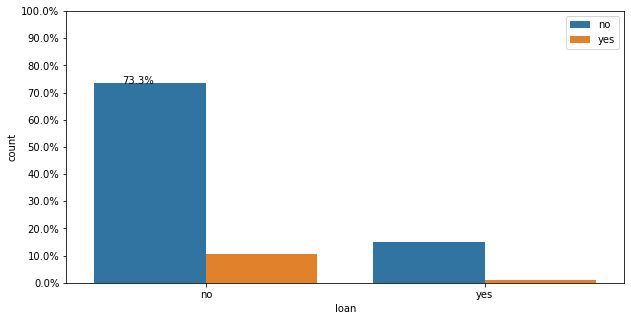

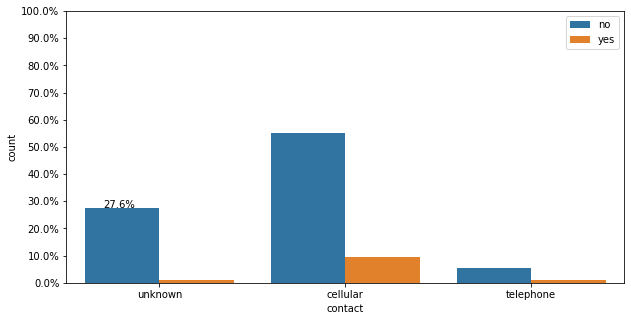

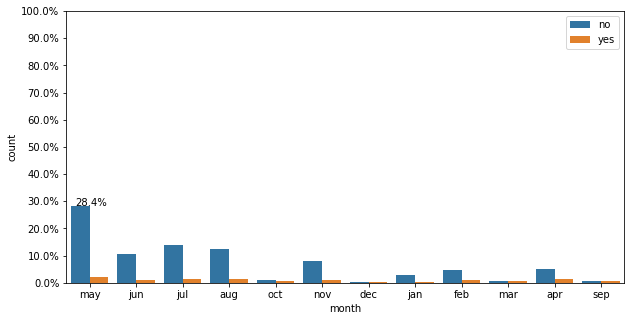

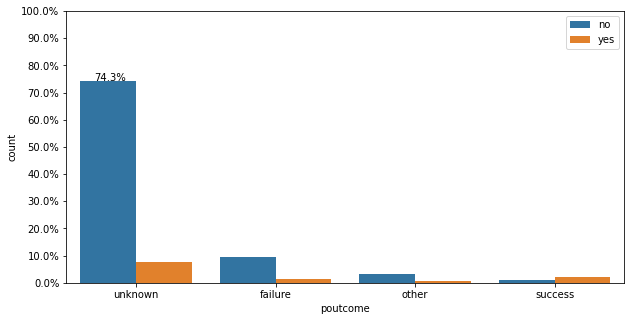

In [3]:
categorcial_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']
yes_freq = (deposite=='yes').sum()
no_freq = (deposite=='no').sum()

for col in categorcial_var:
    if col == "y":
        continue
    else:
        plt.figure(figsize=(10,5))
        Y = df[col]
        total = len(Y)*1
        ax=sns.countplot(x=col, data=df, hue="y")       
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
            ax.yaxis.set_ticks(np.linspace(0, total, 11))
            ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
            ax.set_xticklabels(ax.get_xticklabels())
            ax.legend(labels=["no","yes"])
            plt.show()

### (3) Distribution - numerical variables
The charts shows the distribution of y over numerical variables.
There’s significant difference between the value distribution between “yes” / “no” for =listed variables :
- Previous
- pdays
- Duration

Thus, it can be assumed that previous marketing activities increase the possibility, while longer duration for phone marketing is more likely to lead to success.

Value distribution VS y:  age


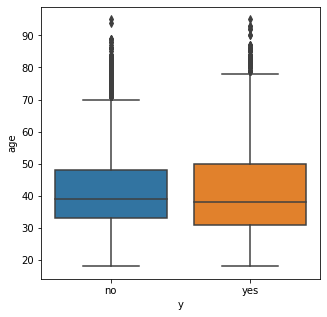

Value distribution VS y:  balance


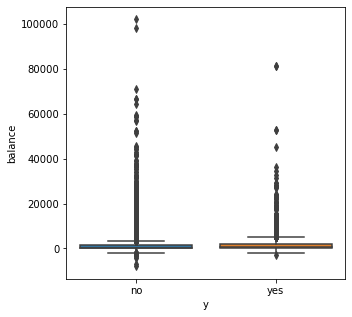

Value distribution VS y:  day


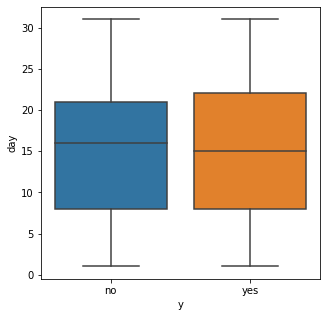

Value distribution VS y:  duration


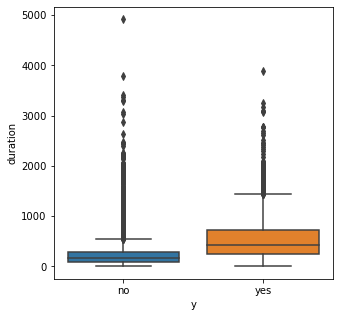

Value distribution VS y:  campaign


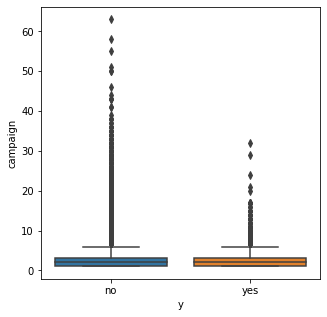

Value distribution VS y:  pdays


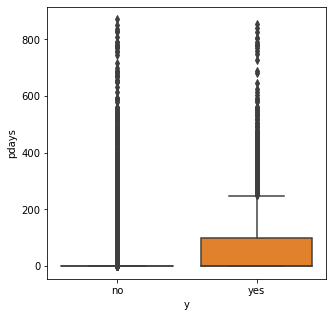

Value distribution VS y:  previous


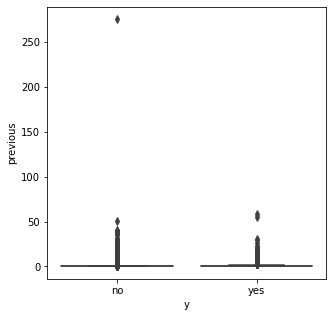

In [4]:
numerical_var = ['age','balance','day','duration','campaign','pdays','previous']
for col in numerical_var:
    print("Value distribution VS y: ", col)
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df,x='y',y=col)
    plt.show()

<Figure size 432x288 with 0 Axes>

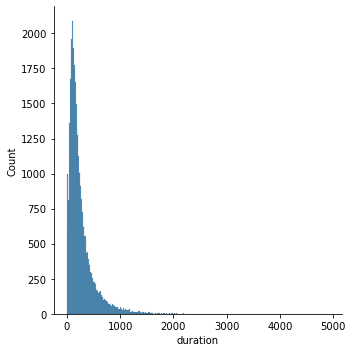

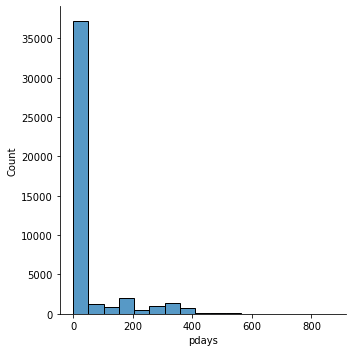

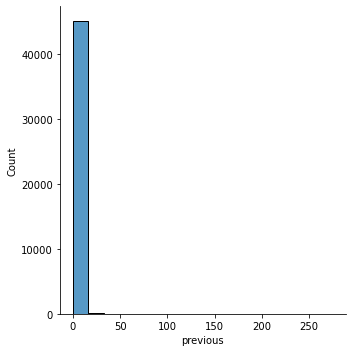

In [5]:
# Distribution for the 3 obvious factors - duration, pday, previous
plt.figure()
sns.displot(df['duration'])
plt.show()
sns.displot(df['pdays'])
plt.show()
sns.displot(df['previous'])
plt.show()

### (4) Correlation
Observation:pdays & previous have the highest correlation; day & campain have relatively obvious correlation.

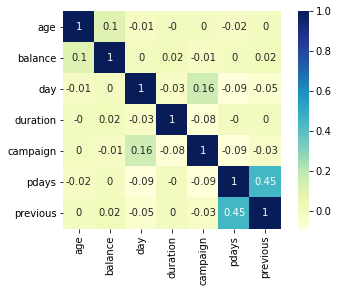

In [7]:
corr = df.corr()
ax = sns.heatmap(round(corr, 2), cmap='YlGnBu',square="True",annot=True)

# 2. Data Prep
### (1) Check the unknown value
From the previous distribution, the following 4 columns have the most unknown value: job, education, contact(large amount), poutcome(large amount).
If all 4 values are missing, then we will drop those records.

We can fill in missing values based on other columns.For instance, missing value in job and education: 
    firstly, aged people will be "retired", so if the age is above median then "unknown" is replaced with "retire".
    Secondly, yonger people are likely to be "student", so if the age is less than 23 then "unknown" is replaced with "student"
    Thirdly, fill edu based on the observaion from job_edu cross tab.

In [8]:
#Drop records that all 4 columns are unknown.
df = df.drop(df[(df['job'] == 'unknown') & (df['education'] == 'unknown') & (df['contact'] == 'unknown') & (df['poutcome'] == 'unknown')].index)

temp_df_age = df[df['job']=='retired']
print(temp_df_age['age'].describe())
#temp_df_job = df[df['age']>59]
#print(temp_df_job['job'].value_counts())

temp_df_age = df[df['job']=='student']
print(temp_df_age['age'].describe())
#temp_df_job = df[df['age']<23]
#print(temp_df_job['job'].value_counts())

def cross_tab(df,c1,c2):
    col1 = list(df[c1].unique())
    col2 = list(df[c2].unique())
    temp_df = []
    for value in col2:
        dfbase = df[df[c2] == value]
        dfpred = dfbase.groupby(c1).count()[c2]
        temp_df.append(dfpred)
    temp_df2 = pd.concat(temp_df,axis=1)
    temp_df2.columns= col2
    temp_df2 = temp_df2.fillna(0)
    return temp_df2

cross_tab(df,"job","education")
print(cross_tab(df,"job","housing"))
print(cross_tab(df,"job","loan"))

df.loc[(df['age']>59) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['age']<23) & (df['job']=='unknown'), 'job'] = 'student'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['job']=='unknown') & (df['education']=='primary'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='secondary'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='tertiary'), 'job'] = 'management'

count    2264.000000
mean       61.626767
std         9.535329
min        24.000000
25%        56.000000
50%        59.000000
75%        67.000000
max        95.000000
Name: age, dtype: float64
count    938.000000
mean      26.542644
std        4.842536
min       18.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64
                yes    no
job                      
admin.         3182  1989
blue-collar    7048  2684
entrepreneur    869   618
housemaid       398   842
management     4678  4780
retired         491  1773
self-employed   765   814
services       2766  1388
student         249   689
technician     4115  3482
unemployed      543   760
unknown          21   213
                 no   yes
job                      
admin.         4180   991
blue-collar    8048  1684
entrepreneur   1131   356
housemaid      1088   152
management     8205  1253
retired        1955   309
self-employed  1350   229
services       3318   

In [8]:
#For those people with "unkown" as prevoius outcome, we can see that they have not been previous contacted, so those are new customer.
print(cross_tab(df,"previous", "poutcome"))

          unknown  failure  other  success
previous                                  
0          3700.0      0.0    0.0      0.0
1             0.0    182.0   61.0     43.0
2             0.0    120.0   42.0     31.0
3             0.0     67.0   30.0     16.0
4             0.0     46.0   16.0     16.0
5             0.0     26.0   16.0      5.0
6             0.0     15.0    2.0      8.0
7             0.0     10.0   10.0      2.0
8             0.0     10.0    6.0      2.0
9             0.0      2.0    7.0      1.0
10            0.0      1.0    2.0      1.0
11            0.0      1.0    0.0      2.0
12            0.0      2.0    3.0      0.0
13            0.0      1.0    0.0      0.0
14            0.0      0.0    0.0      2.0
15            0.0      0.0    1.0      0.0
17            0.0      1.0    0.0      0.0
18            0.0      1.0    0.0      0.0
19            0.0      1.0    0.0      0.0
20            0.0      1.0    0.0      0.0
22            0.0      1.0    0.0      0.0
23         

### (2) Drop columns not so helpful
Last contact day & month do mot make much difference. so we will drop those 2 columns for now.

In [9]:
df_prep = df.drop(['day', 'month'], axis = 1)

### (3) Convert catrgorical data to binary
Here all categorical variables are converted to binary (0,1) for further use.
if all other job related features are 0 then it is unknown; same logic applies to others. Thus, we can drop some dummies.

- Correlation Analysis after data cleaning:
'y_yes' (our target variable) has good correlation with 'duration', 'pdays', 'previous', 'contact_cellular', 'poutcome_success' , 'poutcome_unknown'(newcustomer). These independent variable should be significant in models.

<AxesSubplot:>

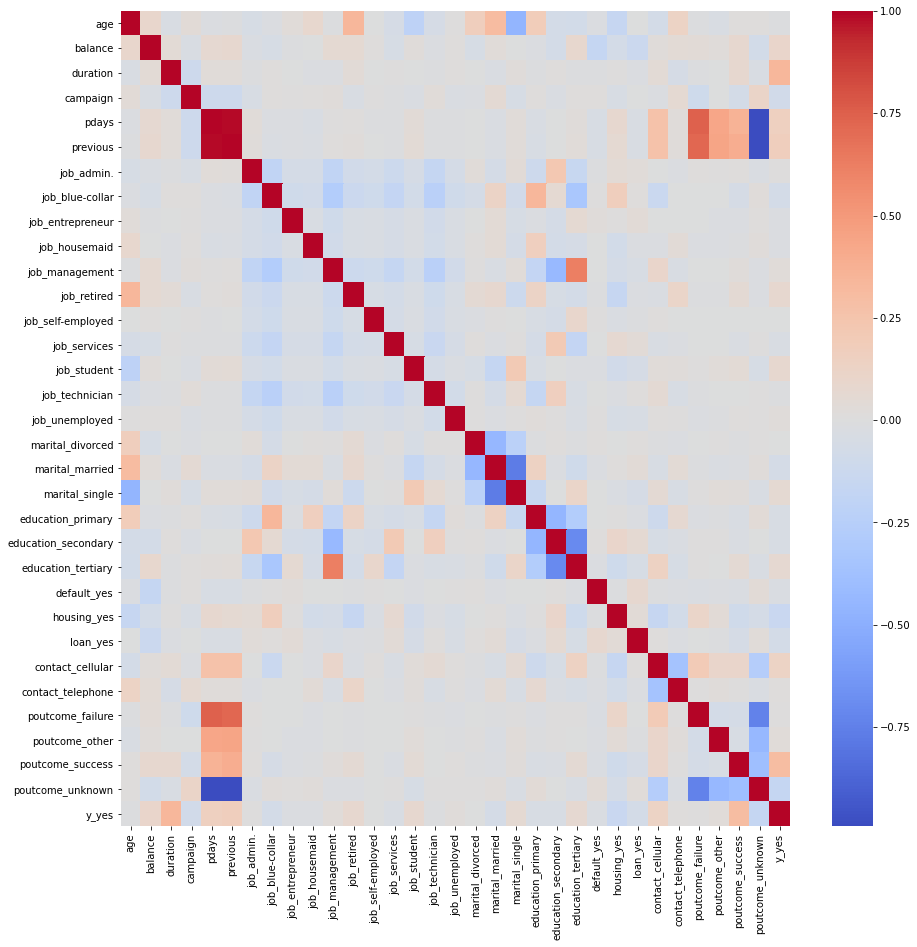

In [10]:
df_with_dummies = pd.get_dummies(df_prep)
df_with_dummies = df_with_dummies.drop(['job_unknown','education_unknown','default_no','housing_no','loan_no','contact_unknown','y_no'], axis = 1)
plt.subplots(figsize=(15, 15))
sns.heatmap(df_with_dummies.corr(method='spearman'), cmap='coolwarm', annot=False)

# 3. Modeling & evaluation

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_with_dummies, train_size=0.8, stratify=df_with_dummies.y_yes.values, random_state=5)
print('Original:', (df_with_dummies.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())
X_train=train.drop(['y_yes'], axis = 1)
y_train=train['y_yes']
X_test=test.drop(['y_yes'], axis = 1)
y_test=test['y_yes']

Original: 0.1171025533139934 Train: 0.11709342560553633 Test: 0.11713906111603188


### (1) Logistic Regression
As the sample is not big and with imbalanced y value, we used 'balanced', and 'multinomial' for classification.
The AUC score is 0.88, thus this is a nice prediction.

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(class_weight='balanced',solver='newton-cg',multi_class='multinomial')
model_lr.fit(X_train, y_train)
y_results_lr = model_lr.predict(X_test)
y_pred_lr = model_lr.predict_proba(X_test)
print("AUC score for Logistic Regression: ", roc_auc_score(y_test, y_pred_lr[:,1]))
acc_lr = accuracy_score(y_test, y_results_lr)
print("Accuracy of Logistic Regression: {:.4%}".format(acc_lr))

resultingDF = X_test
resultingDF['predictions'] = y_results_lr
resultingDF.to_csv('result_lr.csv', index = False)

C:\Users\dhylu\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dhylu\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


AUC score for Logistic Regression:  0.8928732463682771
Accuracy of Logistic Regression: 83.2484%


### （2）Decision Tree
With criterion='entropy' the AUC score is a little higher then 'gini'; if no limit is set for max depth then the AUC score is quite low, so I added max_depth as 5 here.
Overall, LR performs better then Decision Tree in this case.

AUC score for Decision Tree:  0.8712359947712864
Accuracy of Decision Tree: 90.2458%
|--- duration <= 452.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 134.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- campaign >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  77.50
|   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- housing_yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- duration >  134.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- age <= 60.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  60.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- housing_yes >  0.50
|   |   |   |   |--- contact_cellular <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact_cellular >  0.50
|   |   |   |   |   |--- class: 0
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 

[Text(1139.25, 1993.2, 'X[2] <= 452.5\nentropy = 0.521\nsamples = 36125\nvalue = [31895, 4230]'),
 Text(595.2, 1630.8000000000002, 'X[30] <= 0.5\nentropy = 0.37\nsamples = 30976\nvalue = [28771, 2205]'),
 Text(297.6, 1268.4, 'X[2] <= 134.5\nentropy = 0.302\nsamples = 29984\nvalue = [28374, 1610]'),
 Text(148.8, 906.0, 'X[2] <= 77.5\nentropy = 0.109\nsamples = 12796\nvalue = [12611, 185]'),
 Text(74.4, 543.5999999999999, 'X[3] <= 3.5\nentropy = 0.031\nsamples = 5731\nvalue = [5713, 18]'),
 Text(37.2, 181.19999999999982, 'entropy = 0.045\nsamples = 3661\nvalue = [3643, 18]'),
 Text(111.60000000000001, 181.19999999999982, 'entropy = 0.0\nsamples = 2070\nvalue = [2070, 0]'),
 Text(223.20000000000002, 543.5999999999999, 'X[24] <= 0.5\nentropy = 0.161\nsamples = 7065\nvalue = [6898, 167]'),
 Text(186.0, 181.19999999999982, 'entropy = 0.23\nsamples = 3261\nvalue = [3139, 122]'),
 Text(260.40000000000003, 181.19999999999982, 'entropy = 0.093\nsamples = 3804\nvalue = [3759, 45]'),
 Text(446.400

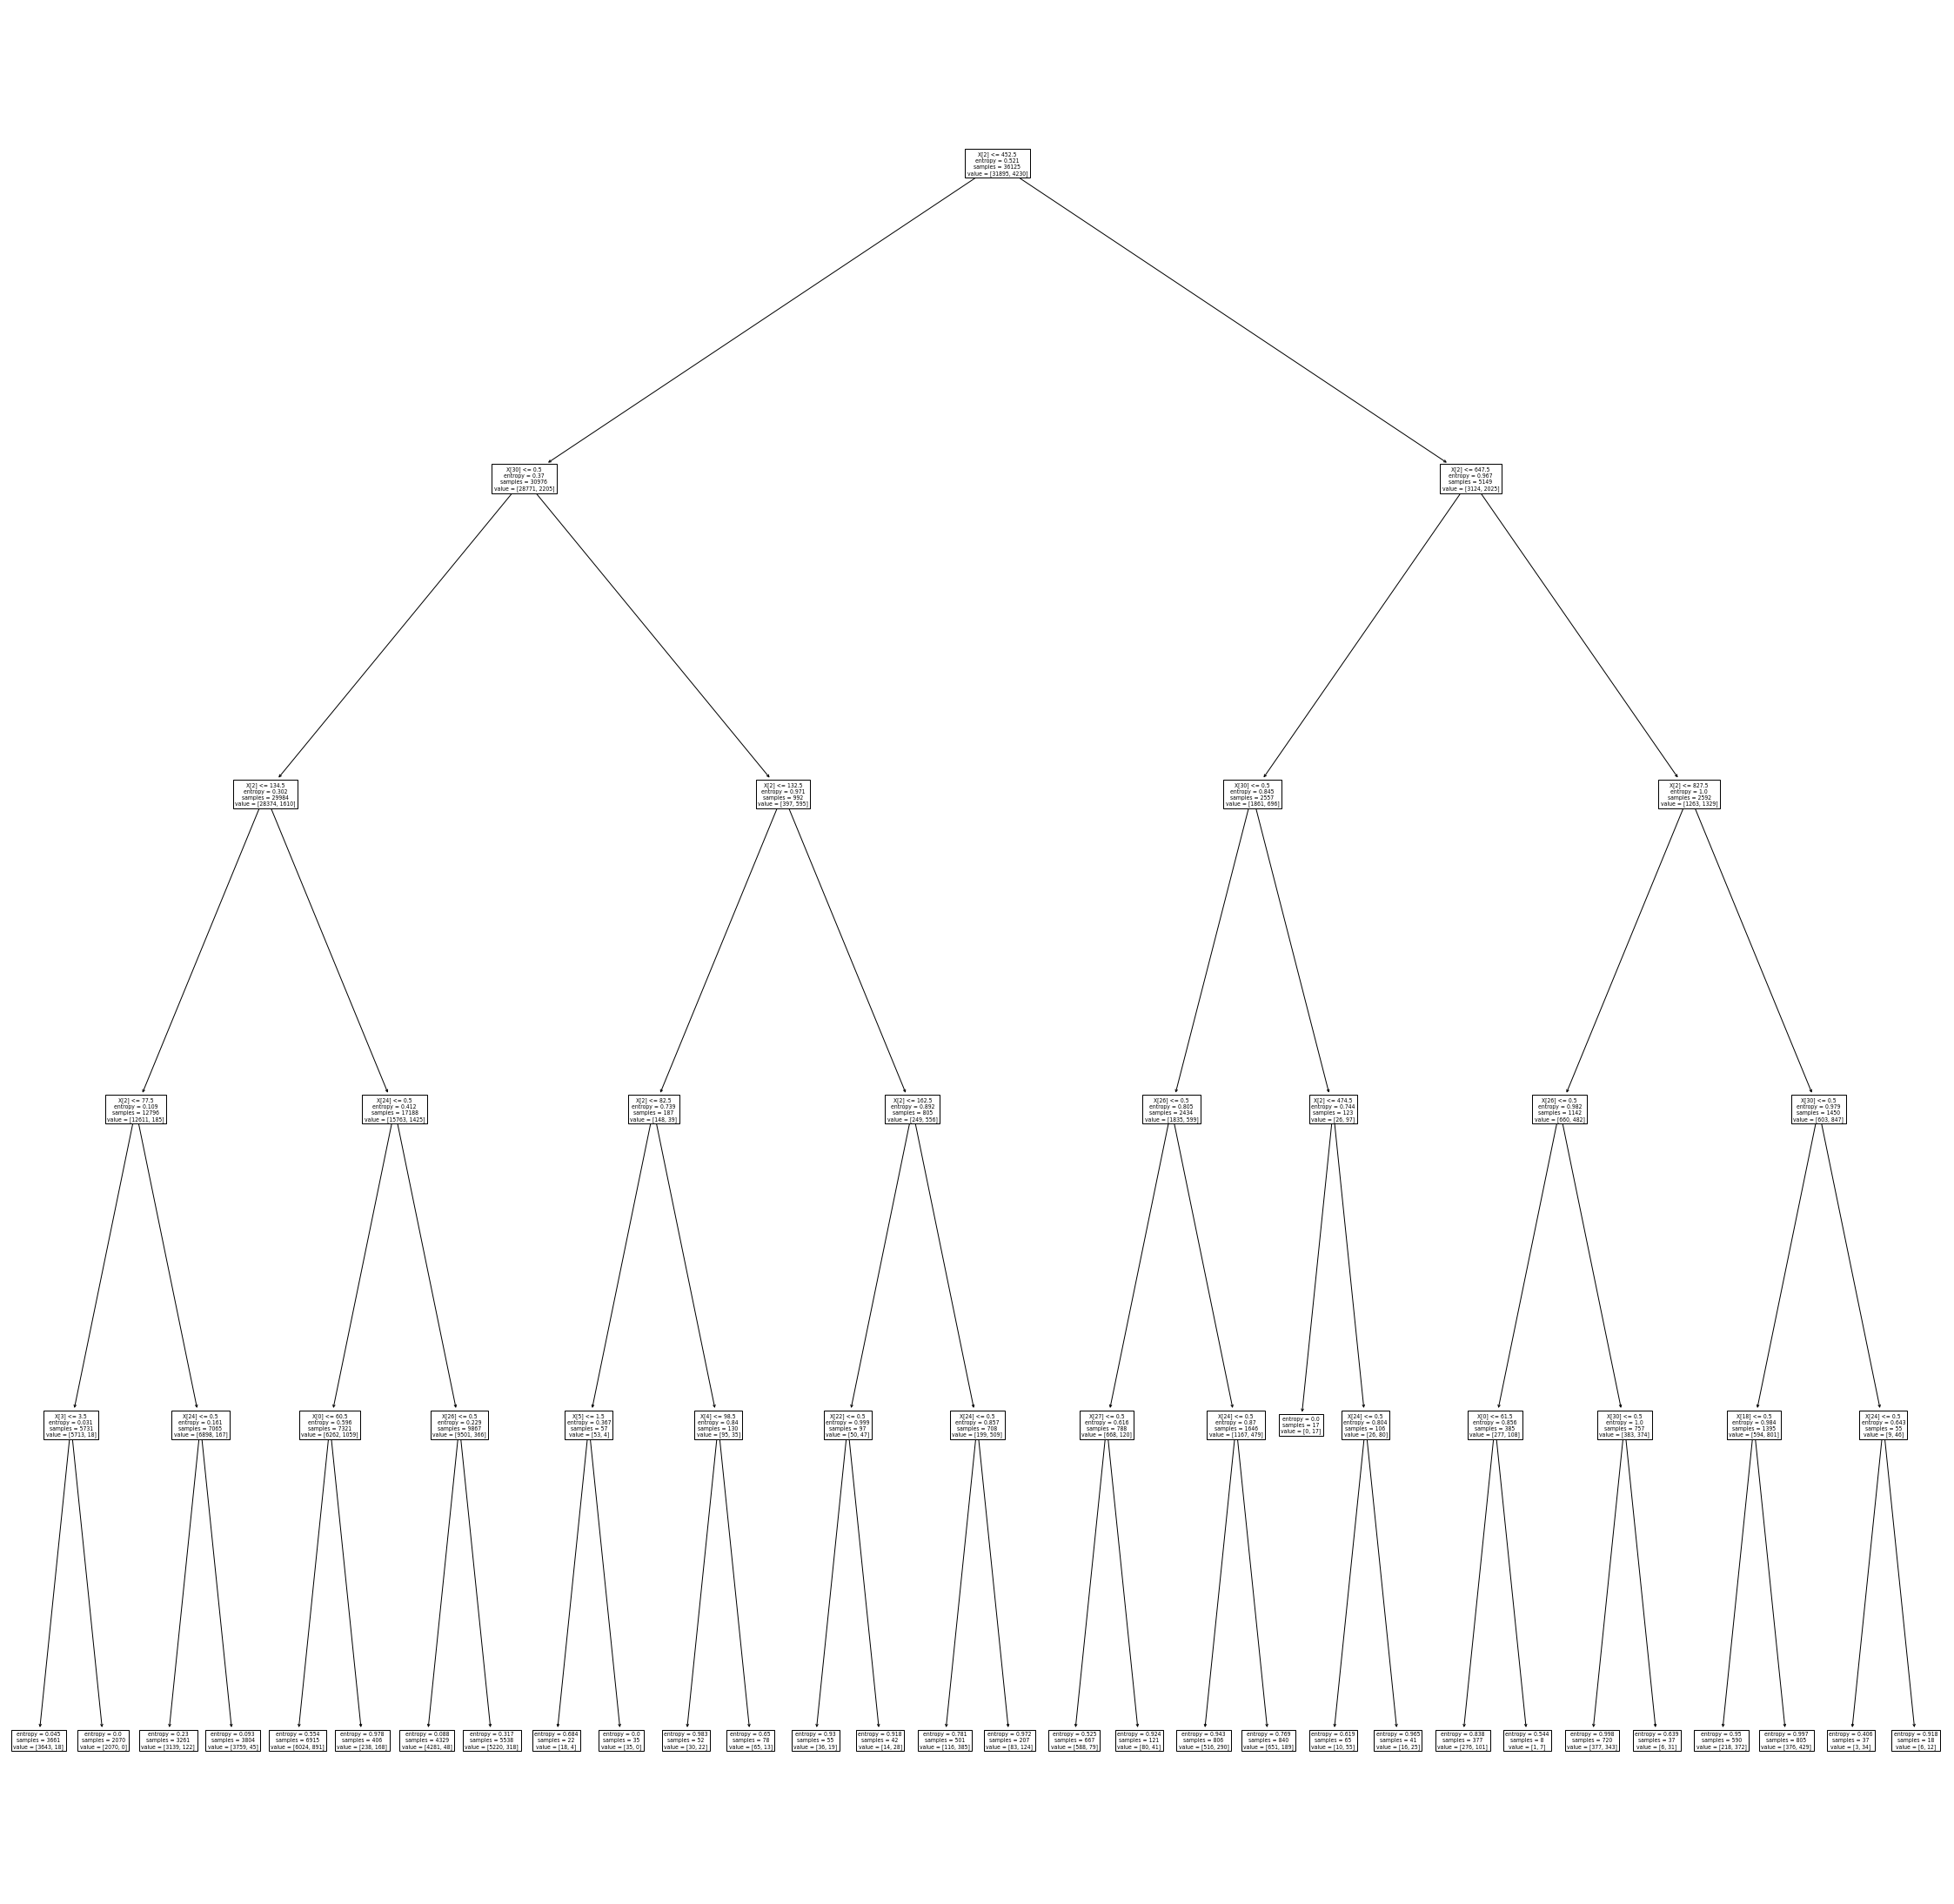

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
model_dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,min_samples_split=2,splitter='best',max_depth=5) 
model_dt.fit(X_train, y_train)
y_results_dt = model_dt.predict(X_test)
y_pred_dt = model_dt.predict_proba(X_test)
print("AUC score for Decision Tree: ", roc_auc_score(y_test, y_pred_dt[:,1]))
acc_dt = accuracy_score(y_test, y_results_dt)
print("Accuracy of Decision Tree: {:.4%}".format(acc_dt))

resultingDF2 = X_test
resultingDF2['predictions'] = y_results_dt
resultingDF2.to_csv('result_dt.csv', index = False)

r = export_text(model_dt, feature_names=list(X_train.columns))
print(r)
from sklearn import tree
plt.subplots(figsize=(40,40))
tree.plot_tree(model_dt)

### (3) Support Vector Machines
Here we used classification method. 2 paremeters are adjusted for better prediction.
klearn.svm.LinearSVC(dual=True, class_weight=None) --> AUC score = 0.82
klearn.svm.LinearSVC(dual=False, class_weight='balanced') --> AUC score = 0.87

In [16]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV


model_svm = CalibratedClassifierCV(LinearSVC(dual=False, class_weight='balanced'))
model_svm.fit(X_train, y_train)
y_results_svm = model_svm.predict(X_test)
y_pred_svm = model_svm.predict_proba(X_test)
print("AUC score for SVM classifier: ", roc_auc_score(y_test, y_pred_svm[:,1]))
acc_svm = accuracy_score(y_test, y_results_svm)
print("Accuracy of SVM classifier: {:.4%}".format(acc_svm))

resultingDF3 = X_test
resultingDF3['predictions'] = y_results_svm
resultingDF3.to_csv('result_svm.csv', index = False)

AUC score for SVM classifier:  0.8923796762919942
Accuracy of SVM classifier: 90.2126%


### (4) Random Forest
Used balanced class_weight to improve the prediction accuracy.

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=128,criterion='entropy',class_weight='balanced',min_samples_split=2,min_samples_leaf=1)
model_rf.fit(X_train, y_train)
y_results_rf = model_rf.predict(X_test)
y_pred_rf = model_rf.predict_proba(X_test)
print("AUC score for Random Forest: ", roc_auc_score(y_test, y_pred_rf[:,1]))
acc_rf = accuracy_score(y_test, y_results_rf)
print("Accuracy of Random Forest: {:.4%}".format(acc_rf))

resultingDF4 = X_test
resultingDF4['predictions'] = y_results_rf
resultingDF4.to_csv('result_rf.csv', index = False)

AUC score for Random Forest:  0.8941298705670555
Accuracy of Random Forest: 90.1351%


### (5) neural network
As this is a small dataset, I made changed 2 default value to get better fit:
 solver{‘lbfgs’}, default=’adam’

In [20]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(hidden_layer_sizes=100, alpha=1, solver='adam',random_state=1)
model_nn.fit(X_train, y_train)
y_results_nn = model_nn.predict(X_test)
y_pred_nn = model_nn.predict_proba(X_test)
print("The mean acuracy of given data: ", model_nn.score(X_test,y_test))
print("AUC score for neural network: ", roc_auc_score(y_test, y_pred_nn[:,1]))
acc_nn = accuracy_score(y_test, y_results_nn)
print("Accuracy of neural network: {:.4%}".format(acc_nn))

resultingDF5 = X_test
resultingDF5['predictions'] = y_results_nn
resultingDF5.to_csv('result_nnrf.csv', index = False)

The mean acuracy of given data:  0.8870682019486271
AUC score for neural network:  0.7111991571852376
Accuracy of neural network: 88.7068%


# 4. Show the important features
With this dataset, SVM has the best performance, so we will use the classifier from SVM to find the desire customer segments.

['age', 'balance', 'campaign', 'collar', 'contact_cellular', 'contact_telephone', 'default_yes', 'duration', 'education_primary', 'education_secondary', 'education_tertiary', 'employed', 'housing_yes', 'job_admin', 'job_blue', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'pdays', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous']


C:\Users\dhylu\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


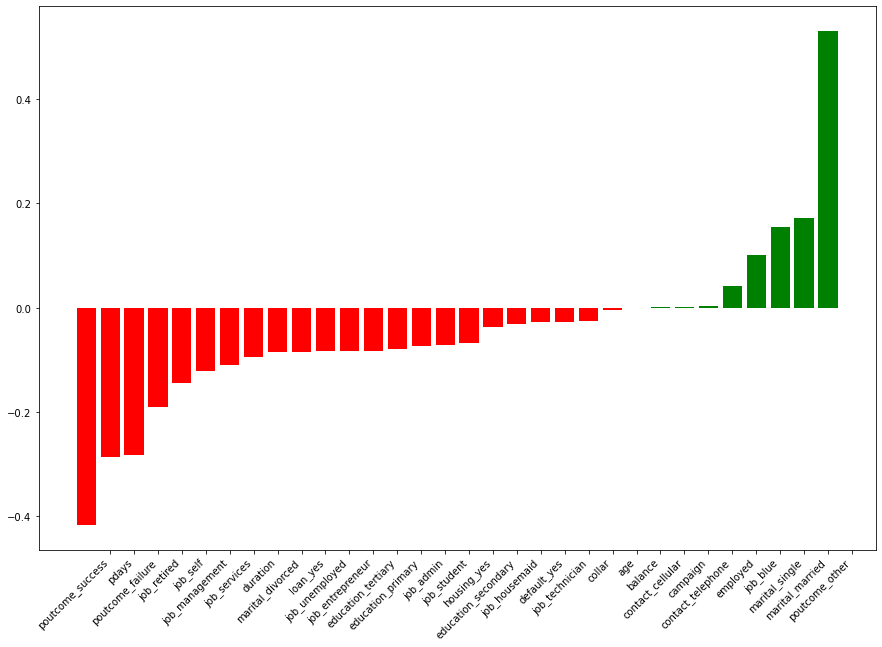

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def plotfeatureimportance(classifier, feature_names,top_features=16):
      coef = classifier.coef_.ravel()
      top_coefficients = np.argsort(coef)

      plt.figure(figsize=(15,10))
      colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
      plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
      feature_names = np.array(feature_names)
      plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
      plt.show()

cv = CountVectorizer()
cv.fit(X_train)
print(cv.get_feature_names())

svm = LinearSVC()
svm.fit(X_train, y_train)
plotfeatureimportance(svm, cv.get_feature_names())